<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* pandas function
* dt 
* regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date, time, datetime, timezone, timedelta

# pandas function

In [2]:
list_file = [f'players_{a:02d}.csv' for a in range(15, 18)]
d1 = pd.concat(map(pd.read_csv, list_file))
d1.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


In [5]:
top_nans = pd.DataFrame(d1.isna().sum()[d1.isna().sum() != 0], columns = ['nans']).nlargest(3, 'nans')
top_nans

,nans
release_clause_eur,36235
loaned_from,33594
nation_position,33187


In [6]:
d1[top_nans.index].fillna(d1.mode().iloc[0,0]).head()

,release_clause_eur,loaned_from,nation_position
0,28.0,28.0,CF
1,28.0,28.0,LW
2,28.0,28.0,RS
3,28.0,28.0,ST
4,28.0,28.0,GK


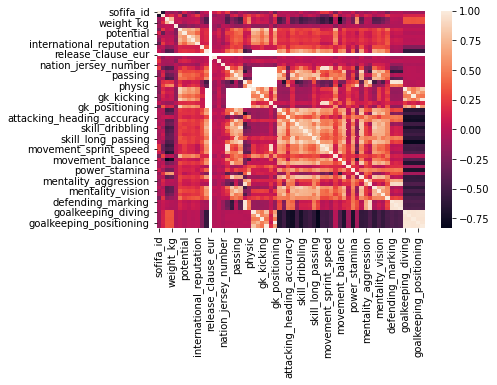

In [7]:
sns.heatmap(d1.corr())

In [14]:
d2 = pd.read_csv('pivot.csv', parse_dates = ['month'], dtype = {'state' : 'category'})
d2.head()

,month,state,permit
0,2020-04-30,Alabama,21276.0
1,2020-04-30,Alaska,85.0
2,2020-04-30,California,24460.0
3,2020-04-30,Massachusetts,5074.0
4,2020-04-30,North Dakota,280.0


In [20]:
s1 = pd.pivot_table(d2, index = 'state', columns = 'month', values = 'permit')
s1

month,2020-01-31,2020-02-29,2020-03-31,2020-04-30
state,,,,
Alabama,37140.0,29633.0,31205.0,21276.0
Alaska,223.0,139.0,143.0,85.0
California,34694.0,32002.0,27792.0,24460.0
Massachusetts,9289.0,9173.0,NaN,5074.0
North Dakota,370.0,396.0,587.0,280.0


In [25]:
s1.columns = s1.columns.astype('str')
s1 = s1.reset_index()
s1

month,state,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,Alabama,37140.0,29633.0,31205.0,21276.0
1,Alaska,223.0,139.0,143.0,85.0
2,California,34694.0,32002.0,27792.0,24460.0
3,Massachusetts,9289.0,9173.0,NaN,5074.0
4,North Dakota,370.0,396.0,587.0,280.0


In [27]:
s1.columns.name = None
s1

,state,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,Alabama,37140.0,29633.0,31205.0,21276.0
1,Alaska,223.0,139.0,143.0,85.0
2,California,34694.0,32002.0,27792.0,24460.0
3,Massachusetts,9289.0,9173.0,NaN,5074.0
4,North Dakota,370.0,396.0,587.0,280.0


In [31]:
s2 = pd.melt(s1, id_vars = 'state', var_name = 'month', value_name = 'permit')
s2.head()

,state,month,permit
0,Alabama,2020-01-31,37140.0
1,Alaska,2020-01-31,223.0
2,California,2020-01-31,34694.0
3,Massachusetts,2020-01-31,9289.0
4,North Dakota,2020-01-31,370.0


In [32]:
s2[d2.columns].head()

,month,state,permit
0,2020-01-31,Alabama,37140.0
1,2020-01-31,Alaska,223.0
2,2020-01-31,California,34694.0
3,2020-01-31,Massachusetts,9289.0
4,2020-01-31,North Dakota,370.0


# dt

In [33]:
d3  = pd.DataFrame({'user_id' : range(1, 7), 
                    'purchase_date' : ["2015-01-23 14:05:21", "2015-02-05 05:07:30", 
                                       "2015-02-18 17:08:51", "2015-03-21 17:07:30", 
                                       "2015-03-11 18:32:56", "2015-03-03 11:02:30"]})

d3.purchase_date = pd.to_datetime(d3.purchase_date)
d3

,user_id,purchase_date
0,1,2015-01-23 14:05:21
1,2,2015-02-05 05:07:30
2,3,2015-02-18 17:08:51
3,4,2015-03-21 17:07:30
4,5,2015-03-11 18:32:56
5,6,2015-03-03 11:02:30


In [36]:
d3.assign(month1 = d3.purchase_date.to_numpy().astype('datetime64[D]'),
          month2 = d3.purchase_date.dt.floor('D') - pd.offsets.MonthBegin(),
          month3 = d3.purchase_date.dt.to_period('M').dt.to_timestamp()
          )

,user_id,purchase_date,month1,month2,month3
0,1,2015-01-23 14:05:21,2015-01-23,2015-01-01,2015-01-01
1,2,2015-02-05 05:07:30,2015-02-05,2015-02-01,2015-02-01
2,3,2015-02-18 17:08:51,2015-02-18,2015-02-01,2015-02-01
3,4,2015-03-21 17:07:30,2015-03-21,2015-03-01,2015-03-01
4,5,2015-03-11 18:32:56,2015-03-11,2015-03-01,2015-03-01
5,6,2015-03-03 11:02:30,2015-03-03,2015-03-01,2015-03-01


In [38]:
x = np.random.randint(1, 100, 200)
cond = [x >= 90, x>= 50, x>= 0]
labs = list('ABC')
pd.DataFrame({'score' : x , 'grade' : np.select(cond, labs)}).head()

,score,grade
0,81,B
1,38,C
2,99,A
3,25,C
4,65,B


In [39]:
np.min(x), np.max(x), np.argmin(x), np.argmax(x)

(1, 99, 45, 2)

In [41]:
x[45], x[2]

(1, 99)

# regression

In [50]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt

In [43]:
a1 = pd.read_csv('heights.csv')
a2 = pd.read_csv('manhattan.csv')

In [48]:
x = a1.height.values.reshape(-1,1)
y = a1.weight

In [49]:
fit_lm = LinearRegression().fit(x, y)

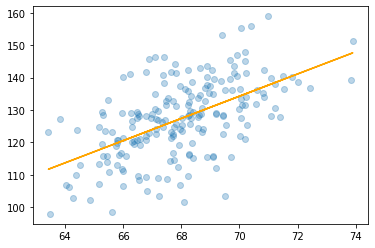

In [52]:
plt.plot(x, y, 'o', alpha = .3)
plt.plot(x, fit_lm.predict(x), color = 'orange')

In [53]:
a2.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [57]:
a2.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [58]:
x = a2[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym']]
y = a2['rent']

In [59]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = 0.7)

In [66]:
fit_lm = LinearRegression().fit(x_tr, y_tr)
pred_lm = fit_lm.predict(x_te)

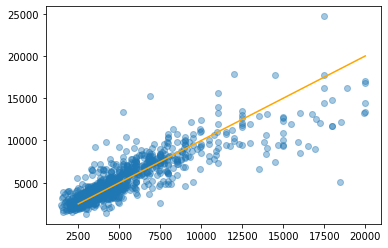

In [67]:
plt.plot(y_te, pred_lm, 'o', alpha = .4)
plt.plot([2500,20000], [2500, 20000], color = 'orange')

In [68]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

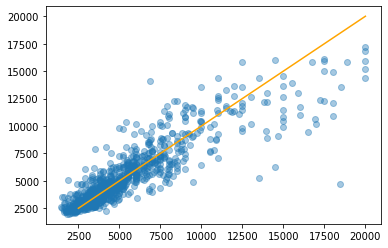

In [69]:
plt.plot(y_te, pred_rf, 'o', alpha = .4)
plt.plot([2500,20000], [2500, 20000], color = 'orange')

In [70]:
fit_lm.score(x_te, y_te), fit_rf.score(x_te, y_te)

(0.7495182318150737, 0.7964717174787448)

In [97]:
raw = sklearn.datasets.load_iris()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = pd.DataFrame(raw['target'], columns = ['target'])
ns = raw['target_names']
y = y.applymap(lambda x : {0 : ns[0], 1: ns[1], 2:ns[2]}.get(x,x))


In [106]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [107]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
pred = fit_rf.predict(x_te)
pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


array(['versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [113]:
score = pd.DataFrame({'y' : y_te['target'], 'pred' : pred})
score.head()

,y,pred
85,versicolor,versicolor
84,versicolor,versicolor
99,versicolor,versicolor
100,virginica,virginica
124,virginica,virginica


In [116]:
score = score.assign(res = lambda x : np.where(x.y == x.pred, 'O', 'X'))
score.groupby('res').count()

,y,pred
res,,
O,44,44
X,1,1
